<a href="https://www.kaggle.com/code/tataighosh/my-portfolio-analysis?scriptVersionId=198673928" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd

# Load the user's uploaded Excel file
file_path = '/kaggle/input/2024-my-stocks/Portfolio_Stocks_1_1_2024.xlsx'

# Read the content of the Excel file to see its structure
portfolio_df = pd.read_excel(file_path)

# Display the first few rows of the dataframe to understand its structure
portfolio_df.head()


,,5 year chart,Name,Outlook,MarketCap,Changepct,Price,International or National,Shares dilutions or buyback,Low52,...,No. Stocks,Avg Cost,Profit,1 year avg growth,5 year avg growth,Beta,Buy point,P/FCF,% off 52 week high,Description
0,SPY,NaN,SPDR S&P 500 ETF Trust,0.0,472.123459,-0.0002,523.07,National,NaN,398.68,...,5.603,2120.56741,810.1938,0.28,0.83,1.00,264.929,NaN,0.002936,Market weighted ETF
1,BLK,NaN,BlackRock Inc,0.0,124.173364,-0.0017,833.70,National,Buyback,596.18,...,4.160,2733.03680,735.1552,0.25,0.90,1.37,459.886,NaN,0.013373,Aladin is used by the entire finance industry ...
2,TQQQ,NaN,ProShares UltraPro QQQ,0.0,NaN,-0.0063,61.56,National,NaN,25.17,...,22.600,892.02200,499.2340,1.18,3.13,NaN,27.629,NaN,0.040075,Triple leveraged ETF with momentum stocks as t...
3,CSQ,NaN,Calamos Strategic Total Return Fund Common Stock,NaN,2.620745,0.0024,16.37,National,NaN,12.50,...,7.000,105.84000,8.7500,0.17,0.31,1.35,10.584,NaN,0.004863,NaN
4,PTY,NaN,PIMCO Corporate&Income Opportunity Fund,NaN,2.220506,0.0007,14.87,National,NaN,11.92,...,15.000,269.10000,-46.0500,0.19,-0.15,0.94,12.558,NaN,0.008667,Bond and gives a stable than 8% returns. Gives...


basic portfolio profits first:

In [2]:
# To analyze portfolio performance, we can calculate overall performance metrics
# such as total portfolio value, total profit, percentage gains, and compare growth rates.

# Calculating total portfolio value
portfolio_df['Total Value'] = portfolio_df['Price'] * portfolio_df['No. Stocks']

# Calculating total profit
total_profit = portfolio_df['Profit'].sum()

# Calculating total investment (initial cost)
total_investment = portfolio_df['Avg Cost'].sum()

# Calculating percentage profit/loss for the portfolio
percentage_profit_loss = (total_profit / total_investment) * 100

# Summarizing key portfolio metrics
portfolio_performance = {
    "Total Investment": total_investment,
    "Total Profit": total_profit,
    "Percentage Profit/Loss": percentage_profit_loss,
    "Total Portfolio Value": portfolio_df['Total Value'].sum()
}

portfolio_performance


{'Total Investment': 101266.931316,
 'Total Profit': 13614.1148032,
 'Percentage Profit/Loss': 13.443791202399153,
 'Total Portfolio Value': 63826.7592594}


profit distributions:

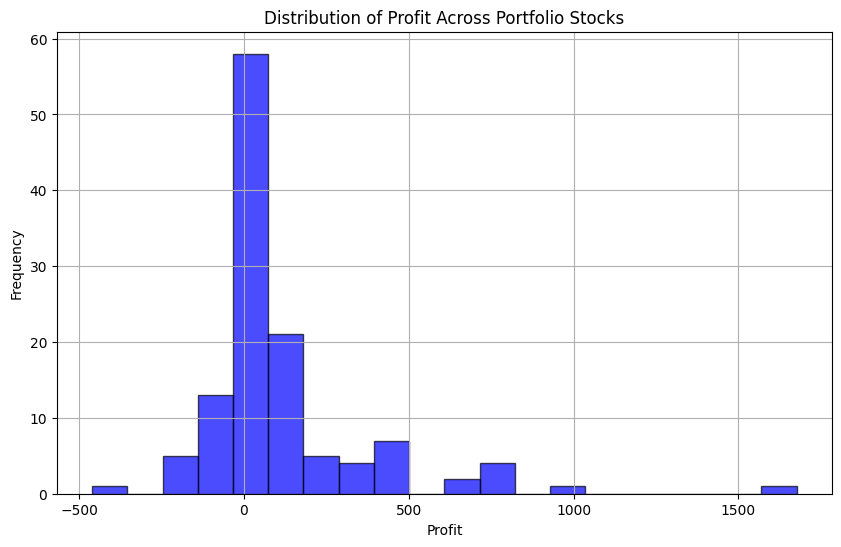

In [3]:
import matplotlib.pyplot as plt

# Plot the distribution of profit for the portfolio
plt.figure(figsize=(10, 6))
plt.hist(portfolio_df['Profit'].dropna(), bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Profit Across Portfolio Stocks')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.grid(True)

# Show the plot
plt.show()


In [4]:
# 1. Portfolio Diversification: National vs International
diversification = portfolio_df['International or National'].value_counts()

# 2. Top-performing stocks based on profit
top_performers = portfolio_df[['Name', 'Profit']].sort_values(by='Profit', ascending=False).head(10)

# 3. Risk Analysis: Average Beta
portfolio_df['Beta'] = pd.to_numeric(portfolio_df['Beta'], errors='coerce')
average_beta = portfolio_df['Beta'].mean()

# 4. Cost Efficiency: Compare average cost against current price
portfolio_df['Price'] = pd.to_numeric(portfolio_df['Price'], errors='coerce')
portfolio_df['Avg Cost'] = pd.to_numeric(portfolio_df['Avg Cost'], errors='coerce')
cost_efficiency = portfolio_df[['Name', 'Avg Cost', 'Price']]

# 5. Growth Prospects: Compare 1 year vs 5 year average growth
portfolio_df['1 year avg growth'] = pd.to_numeric(portfolio_df['1 year avg growth'], errors='coerce')
portfolio_df['5 year avg growth'] = pd.to_numeric(portfolio_df['5 year avg growth'], errors='coerce')
growth_comparison = portfolio_df[['Name', '1 year avg growth', '5 year avg growth']]

# Display the results
print("Portfolio Diversification:\n", diversification)
print("\nTop 10 Performing Stocks:\n", top_performers)
print("\nAverage Beta (Risk Analysis):\n", average_beta)
print("\nCost Efficiency (Avg Cost vs Price):\n", cost_efficiency.head())
print("\nGrowth Comparison (1 Year vs 5 Year):\n", growth_comparison.head())

Portfolio Diversification:
 International or National
National         102
International     21
Name: count, dtype: int64

Top 10 Performing Stocks:
                                     Name       Profit
49                    Meta Platforms Inc  1676.498240
67                          Broadcom Inc   975.410000
0                 SPDR S&P 500 ETF Trust   810.193800
50                  Alphabet Inc Class A   771.598303
15              Simon Property Group Inc   769.600000
1                          BlackRock Inc   735.155200
77   Vertex Pharmaceuticals Incorporated   630.630000
109                         Griffon Corp   627.524800
2                 ProShares UltraPro QQQ   499.234000
83         Regeneron Pharmaceuticals Inc   490.550000

Average Beta (Risk Analysis):
 1.0694871794871794

Cost Efficiency (Avg Cost vs Price):
                                                Name    Avg Cost   Price
0                            SPDR S&P 500 ETF Trust  2120.56741  523.07
1                     

#Risk comparison:

In [5]:
# Ensure Beta column is numeric for calculations
portfolio_df['Beta'] = pd.to_numeric(portfolio_df['Beta'], errors='coerce')

# Group stocks into different risk categories based on their beta values
low_risk_stocks = portfolio_df[portfolio_df['Beta'] < 1]
market_risk_stocks = portfolio_df[portfolio_df['Beta'] == 1]
high_risk_stocks = portfolio_df[portfolio_df['Beta'] > 1]

# Calculate the count of stocks in each risk category
average_beta = portfolio_df['Beta'].mean()
risk_distribution = {
    'Low Risk (< 1)': len(low_risk_stocks),
    'Market Risk (= 1)': len(market_risk_stocks),
    'High Risk (> 1)': len(high_risk_stocks),
    'Average Beta': average_beta
}

# Display the risk distribution
print(risk_distribution)

{'Low Risk (< 1)': 48, 'Market Risk (= 1)': 9, 'High Risk (> 1)': 60, 'Average Beta': 1.0694871794871794}


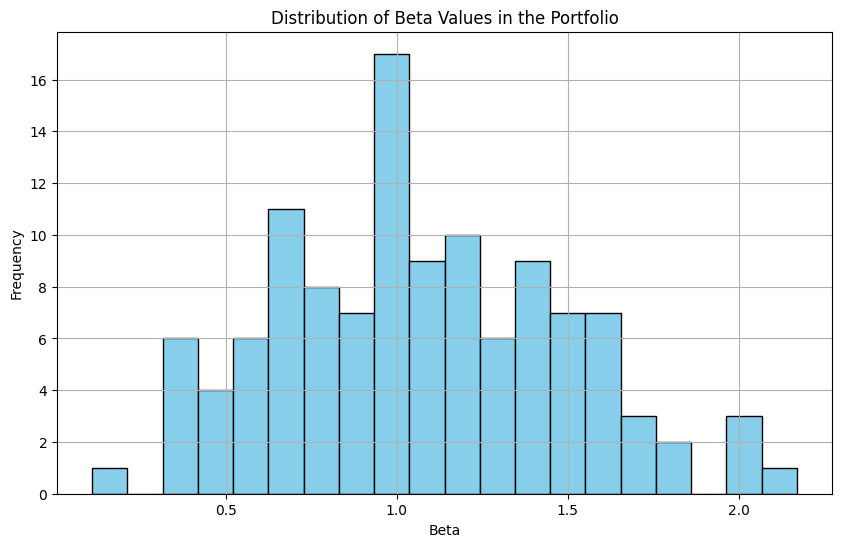

In [6]:
# Ensure Beta column is numeric for calculations
portfolio_df['Beta'] = pd.to_numeric(portfolio_df['Beta'], errors='coerce')

# Create a histogram to visualize the distribution of beta values in the portfolio
plt.figure(figsize=(10, 6))
plt.hist(portfolio_df['Beta'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Beta Values in the Portfolio')
plt.xlabel('Beta')
plt.ylabel('Frequency')
plt.grid(True)

# Show the plot
plt.show()

Validity and Sharpe Ratio:

**Total Portfolio Value by Stock:** A bar chart showing the total value held in each stock across your portfolio.
**Total Profit by Stock:** A bar chart displaying the total profit generated by each stock in your portfolio.
**Beta vs 1 Year Avg Growth:** A scatter plot comparing the volatility (Beta) of your stocks against their 1-year average growth, helping you assess the risk/reward of each investment.

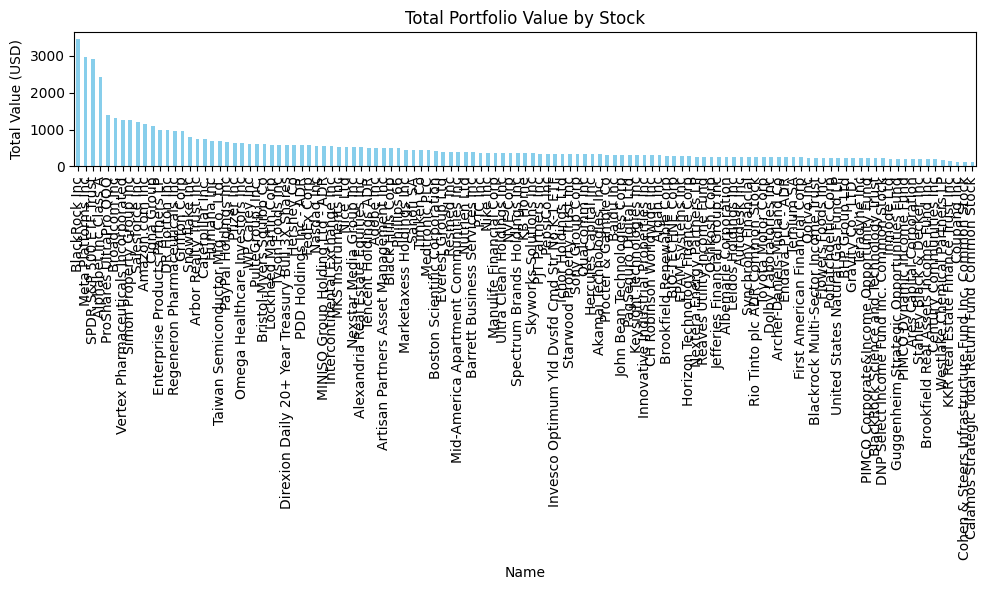

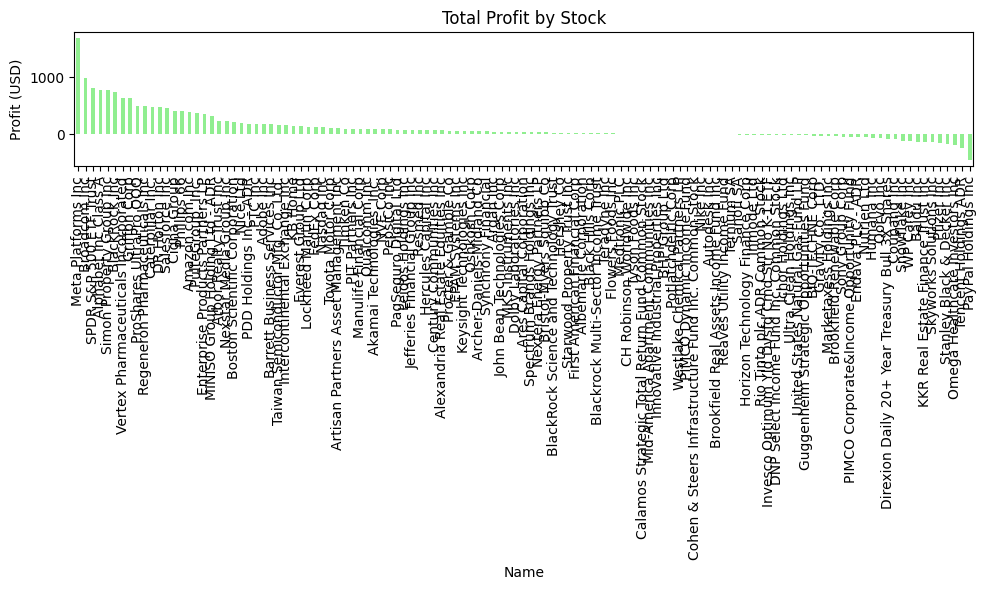

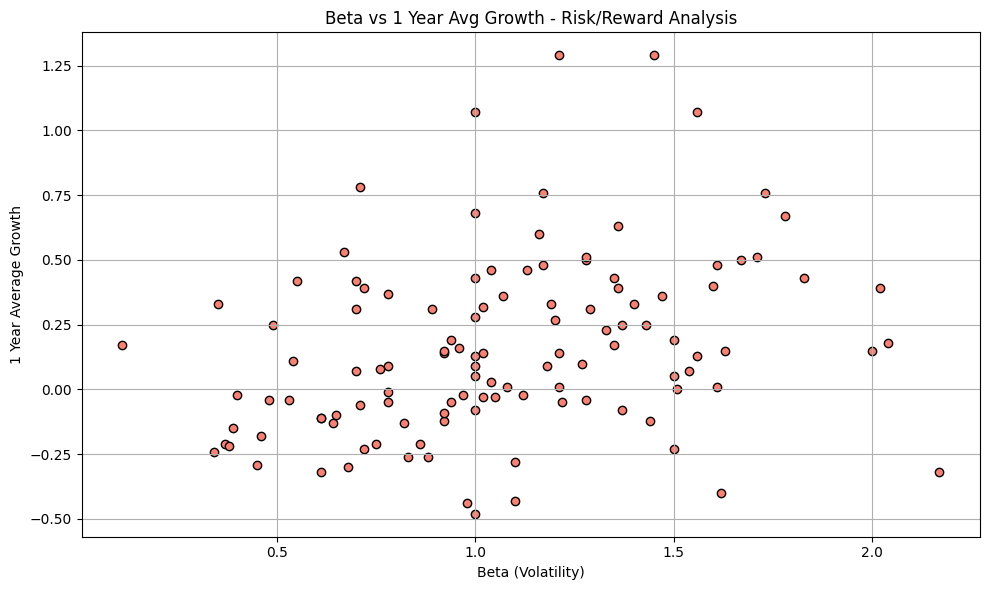

0.26562457037427517

In [7]:
import matplotlib.pyplot as plt

# Create visualizations and perform financial calculations for portfolio validation

# Total Portfolio Value by Stock
plt.figure(figsize=(10, 6))
portfolio_df.groupby('Name')['Total Value'].sum().sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Total Portfolio Value by Stock')
plt.ylabel('Total Value (USD)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Distribution of Stock Profits
plt.figure(figsize=(10, 6))
portfolio_df.groupby('Name')['Profit'].sum().sort_values(ascending=False).plot(kind='bar', color='lightgreen')
plt.title('Total Profit by Stock')
plt.ylabel('Profit (USD)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Beta vs 1 Year Avg Growth - Risk/Reward Analysis
plt.figure(figsize=(10, 6))
plt.scatter(portfolio_df['Beta'], portfolio_df['1 year avg growth'], color='salmon', edgecolor='black')
plt.title('Beta vs 1 Year Avg Growth - Risk/Reward Analysis')
plt.xlabel('Beta (Volatility)')
plt.ylabel('1 Year Average Growth')
plt.grid(True)
plt.tight_layout()
plt.show()

# Validating Portfolio with Sharpe Ratio Calculation
# The Sharpe Ratio evaluates risk-adjusted return; we calculate it for the portfolio

# Calculate the total value of the portfolio
total_value = portfolio_df['Total Value'].sum()

# Recalculate the average yearly growth
portfolio_df['Weighted Growth'] = (portfolio_df['1 year avg growth'] * portfolio_df['Total Value']) / total_value
average_yearly_growth = portfolio_df['Weighted Growth'].sum()

# Recalculate portfolio volatility (weighted average of Beta)
portfolio_volatility = (portfolio_df['Beta'] * (portfolio_df['Total Value'] / total_value)).sum()

# Assuming a risk-free rate (like a government bond rate) of 2% (0.02)
risk_free_rate = 0.02

# Sharpe Ratio calculation
sharpe_ratio = (average_yearly_growth - risk_free_rate) / portfolio_volatility

sharpe_ratio


The Sharpe Ratio of your portfolio is 0.27. This indicates that your portfolio has a moderate level of risk-adjusted return.

The Sharpe Ratio is a common measure of risk-adjusted return. A higher ratio suggests better returns for the risk taken. Your portfolio has a moderate Sharpe Ratio of 0.27, indicating a reasonable balance between risk and return.